<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module6/M6_1/0_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nonlinear Programming (Polynomial Intro)
**OPIM 5641: Business Decision Modeling - Dept. of Operations and Information Management - University of Connecticut**

Let's learn about the 'hill climber in the fog' and why intitial conditions can yield different answers!

------------------------------------

Related Readings:
* `Powell`: Chapter 8 (Nonlinear Optimization)




## Motivation for nonlinear programming

When Dantzig presented the simplex algorithm, his work was heavily criticized by some of his fellow academic colleagues, as the method applied solely to linear programs. One of the critics said that the method was not really useful, as the world was highly nonlinear. Today the simplex algorithm is recognized as one of the biggest achievements of the last century, but this did not change the fact that world is indeed highly nonlinear.

In this module, we will see the pros and cons of nonlinear programming. A major pro is the fact that the modeling tasks becomes relatively simpler, as we do not have to worry about linearity contraints any longer. Namely, you can multiply variables, take square roots, logs, absolute values, etc. This is important because some problems cannot be properly modeled as linear programs. On the other hand, whereas the modeling task is easier, the identification of optimal solutions becomes significantly harder. Whereas the simplex algorithm will necessarily give you an optimal solution (if you wait for its termination), we never really know whether the solution we have for some arbitrary nonlinear model is actually optimal or not. We will see these aspect in the example presented in this notebook.

After reading this notebook, you should understand that:
* Don't forget to initialize the decision variables when working with nonlinear models (more details below);
* Try different initial values for the decision variables (you will understand why below);
* If you can infer lower and upper bounds for your decision variables, **use them**!
* Use linear models if you can





## Setup Your Environment/Imports

In this module we will use [Ipopt](https://coin-or.github.io/Ipopt/), a solver capable of addressing nonlinear models.

In [ ]:
# before you do anything...
# mount your drive!
# click folder on the left...
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("ipopt") or os.path.isfile("ipopt")):
    if "google.colab" in sys.modules:
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        #!apt-get install -y -qq glpk-utils
    else:
        try:
            !conda install -c conda-forge ipopt
        except:
            pass

assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *

     |████████████████████████████████| 9.1 MB 5.4 MB/s 
     |████████████████████████████████| 49 kB 4.0 MB/s 


# Polynomials (extracted from the textbook)


Suppose you are a manufacturer of widgets. You are interested in finding the price to sell your widgets at in order to maximize the number of units purchased.  Consultants have modeled the relationship between price $𝐩$ and number of units sold $𝐧$ as

$n(p) = 𝟑𝟎𝟎+𝟑𝟎𝟎𝐩−𝟔𝟎𝐩^𝟐−𝟏𝟕.𝟓𝐩^𝟑+𝟓.𝟑𝟐𝐩^𝟒−𝟎.𝟑𝟑𝐩^𝟓$

What value of $p$ results in the maximum number of units sold? Is it possible to model this problem as a linear program?


**Objective Function**

$\max (300 + 300p - 60p^2 - 17.5p^3 + 5.32p^4 - 0.33p^5)$ `objective function`

subject to:

* $p \in \mathbb{R}^+$ `(Domain)`



## Pro of nonlinear optimization: nonlinear models are simpler to design!

... but we will see that the initialization value will have an impact in the results. First, we will initialize p to 1.

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables  - Initialize variable to 1.0
model.p = Var(domain=NonNegativeReals, initialize=1)

# alternative way of initializing a decision variable
# model.p.value = 1

# declare objective
model.cost = Objective(
                      expr = 300 + 300*model.p - 60*model.p**2 - 17.5*model.p**3 + 5.32*model.p**4 - 0.33*model.p**5,
                      sense = maximize)

# show the model you've created
model.pprint()

1 Var Declarations
    p : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :     1 :  None : False : False : NonNegativeReals

1 Objective Declarations
    cost : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 300 + 300*p - 60*p**2 - 17.5*p**3 + 5.32*p**4 - 0.33*p**5

2 Declarations: p cost


In [ ]:
# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
# show the results
print("Objective value = ", model.cost())
print("p = ", model.p())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 1
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.014344930648803711
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Object

## Trying a different initial value

The optimal solution when we start the model using p = 1 is 594.71, with p = 1.95. Let's see what happens when we start the model using p = 9...

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables  - Initialize variable to 9
model.p = Var(domain=NonNegativeReals, initialize=9)

# declare objective
model.cost = Objective(
                      expr = 300 + 300*model.p - 60*model.p**2 - 17.5*model.p**3 + 5.32*model.p**4 - 0.33*model.p**5,
                      sense = maximize)

# solve it
SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
# show the results
print("Objective value = ", model.cost())
print("p = ", model.p())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 1
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.016548633575439453
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
Object

## Solution changed after we selected a new initial value for $p$

Whereas starting from $p = 1$ gave as optimal value 594.71 and optimal $p = 1$, starting from $p = 9$ gave us optimal value 900.10 an optimal $p = 8.36$. Let's plot this function, just to see if we are close to the optimal value.



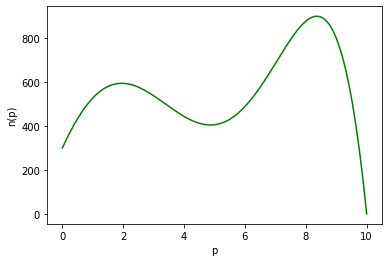

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 100 linearly spaced numbers
x = np.linspace(0,10,1000)

# our function
y = 300 + 300*x - 60*x**2  - 17.5*x**3 + 5.32*x**4 - 0.33*x**5

#print(y)

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# labels
plt.xlabel('p')
plt.ylabel('n(p)')

# plot the function
plt.plot(x,y, 'g')

# show the plot
plt.show()

## Con of nonlinear optimization: you may not know whether your solution is optimal!


The first solution was a **local optimum**, whereas the second one is a **global optimum**. However, we could not tell a priori whether the first solution was only a local optimum. In this example, we know that the second solution is not only a local optimum, but also a global optimum. In general, though, we cannot check that, and this is why nonlinear models are challenging to solve (even though they are usually easier to model).

## Remember the recommendations:
* Don't forget to initialize the decision variables (as you can see, the initial value matters)
* Try different initialization values when solving nonlinear optimization problems


# Uncertainty in the parameters - Monte Carlo

Let's see now how the quality of our two "optimal" solutions change if we assume that the parameters of the polynomial may change within a range of 10%.



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
a = 300 
b = 300
c = 60
d = 17.5
e = 5.32
f = 0.33

# Optimal solutions
p1 = 1.95
p2 = 8.36

# List of results
results1 = list()
results2 = list()

# Errors
error = 0.01
low_range = 1 - error
high_range = 1 + error

for k in range(10000):
  aa = a*np.random.uniform(low=low_range,high=high_range)
  bb = b*np.random.uniform(low=low_range,high=high_range)
  cc = c*np.random.uniform(low=low_range,high=high_range)
  dd = d*np.random.uniform(low=low_range,high=high_range)
  ee = e*np.random.uniform(low=low_range,high=high_range)
  ff = f*np.random.uniform(low=low_range,high=high_range)

  nn1 = aa + bb*p1 - cc*p1**2 - dd*p1**3 + ee*p1**4 - ff*p1**5
  nn2 = aa + bb*p2 - cc*p2**2 - dd*p2**3 + ee*p2**4 - ff*p2**5

  results1.append(nn1)
  results2.append(nn2)


## Quality of the first solution



Mean of first solution: 594.6762409034139


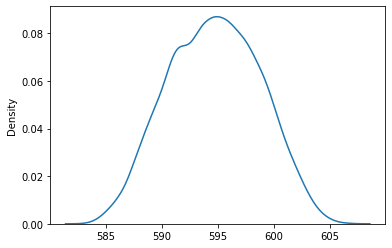

In [ ]:
print("Mean of first solution:",np.mean(results1))
sns.kdeplot(results1)
plt.show()

## Quality of the second solution

Mean of second solution: 900.0077948314496


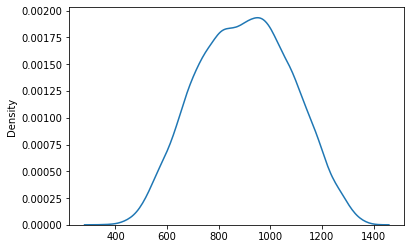

In [ ]:
print("Mean of second solution:",np.mean(results2))
sns.kdeplot(results2)
plt.show()